In [16]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os

sns.set_style("whitegrid")

RAW_PATH = "../../data/raw/kinematic_equation_dataset.csv"
PROCESSED_PATH = "../../data/processed/kinematic_equation_cleaned_dataset.csv"

if not os.path.exists(RAW_PATH):
    raise FileNotFoundError(f"Raw dataset not found at: {RAW_PATH}")

In [17]:

df = pd.read_csv(RAW_PATH)
print(f"🔹 Raw dataset loaded: {df.shape[0]} rows × {df.shape[1]} columns")
df.head()

🔹 Raw dataset loaded: 3000 rows × 3 columns


,Acceleration_ms2,Time_s,Displacement_m
0,7.803532,6.759760,178.288670
1,19.038929,7.987146,607.289463
2,14.773882,2.579632,49.156415
3,12.173840,6.286254,240.536730
4,3.542363,5.760285,58.769379


In [18]:
missing = df.isnull().sum()
print("Missing values:\n", missing)

if missing.sum() == 0:
    print("✅ No missing values found.")
else:
    print("⚠️ Warning: Missing values detected.")

Missing values:
 Acceleration_ms2    0
Time_s              0
Displacement_m      0
dtype: int64
✅ No missing values found.


In [19]:
df_cleaned = df.copy()

invalid = df_cleaned[(df_cleaned["Acceleration_ms2"] <= 0) | (df_cleaned["Time_s"] <= 0)]
print(f"⚠️ Invalid rows to drop: {invalid.shape[0]}")

df_cleaned = df_cleaned[(df_cleaned["Acceleration_ms2"] > 0) & (df_cleaned["Time_s"] > 0)]
print(f"✅ Cleaned dataset shape: {df_cleaned.shape}")

⚠️ Invalid rows to drop: 0
✅ Cleaned dataset shape: (3000, 3)


In [20]:
df_cleaned["recomputed_displacement"] = 0.5 * df_cleaned["Acceleration_ms2"] * df_cleaned["Time_s"] ** 2
df_cleaned["error"] = np.abs(df_cleaned["recomputed_displacement"] - df_cleaned["Displacement_m"])

tolerance = 1e-6
initial = df_cleaned.shape[0]
df_cleaned = df_cleaned[df_cleaned["error"] < tolerance]
print(f"✅ Removed {initial - df_cleaned.shape[0]} rows due to displacement inconsistency.")

✅ Removed 0 rows due to displacement inconsistency.


In [21]:
df_cleaned.drop(columns=["recomputed_displacement", "error"], inplace=True)

os.makedirs(os.path.dirname(PROCESSED_PATH), exist_ok=True)

df_cleaned.to_csv(PROCESSED_PATH, index=False)
print(f"✅ Cleaned dataset saved to: {PROCESSED_PATH}")

✅ Cleaned dataset saved to: ../../data/processed/kinematic_equation_cleaned_dataset.csv


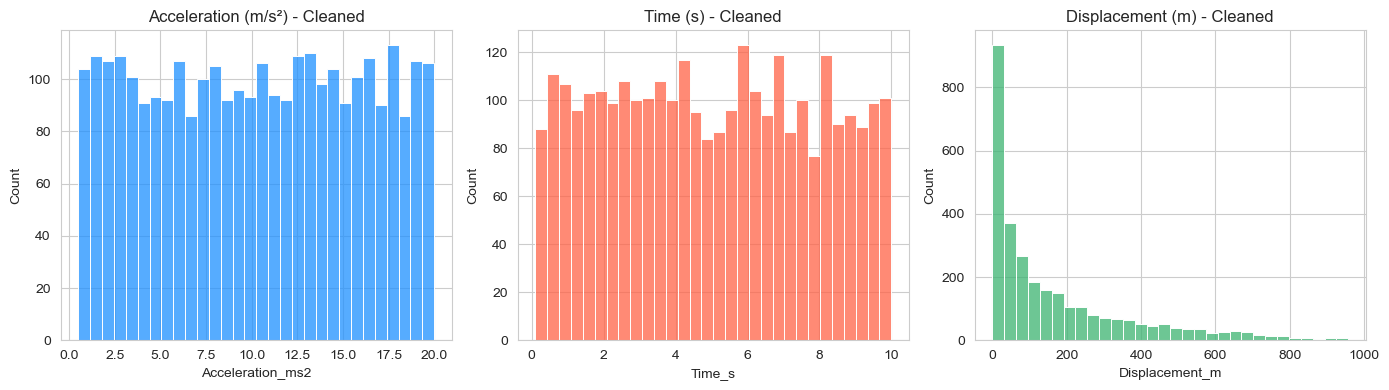

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(df_cleaned["Acceleration_ms2"], bins=30, color="dodgerblue")
plt.title("Acceleration (m/s²) - Cleaned")

plt.subplot(1, 3, 2)
sns.histplot(df_cleaned["Time_s"], bins=30, color="tomato")
plt.title("Time (s) - Cleaned")

plt.subplot(1, 3, 3)
sns.histplot(df_cleaned["Displacement_m"], bins=30, color="mediumseagreen")
plt.title("Displacement (m) - Cleaned")

plt.tight_layout()
plt.show()
